In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from matplotlib.path import Path
from itertools import product

from collections import defaultdict

In [3]:
from enum import Enum
    
class PolygonType(Enum):
    CLOSED = 'closed'
    OPEN = 'open'
    TEXTURE = 'textured'
    TEXTURE_WITH_CONTOUR = 'texture with contour'
    DIRECTION = 'directionality'

In [4]:
volume_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_volumes/'
if not os.path.exists(volume_dir):
    os.makedirs(volume_dir)

In [4]:
##### reconstruct annotation volume ######

In [5]:
downsample_factor = 16

section_thickness = 20 # in um
xy_pixel_distance_lossless = 0.46
xy_pixel_distance_tb = xy_pixel_distance_lossless * 32 # in um, thumbnail
# factor = section_thickness/xy_pixel_distance_lossless

xy_pixel_distance_downsampled = xy_pixel_distance_lossless * downsample_factor
z_xy_ratio_downsampled = section_thickness / xy_pixel_distance_downsampled

stack = 'MD585'
    
# build annotation volume
section_bs_begin, section_bs_end = section_range_lookup[stack]
print section_bs_begin, section_bs_end

78 347


In [6]:
labels_merge_map = {'SolM': 'Sol'}

In [7]:
dm = DataManager(stack=stack)

In [8]:
label_polygons = defaultdict(lambda: {})

for sec in range(section_bs_begin, section_bs_end+1):
    
    dm.set_slice(sec)
    
    ret = dm.load_proposal_review_result('autoAnnotate', 'latest', 'consolidated')

    if ret is None:
        continue

    print sec

    usr, ts, suffix, annotations = ret
    
    for ann in annotations:
        label = ann['label']
        if label in labels_merge_map:
            label = labels_merge_map[label]
        label_polygons[label][sec] = np.array(ann['vertices']).astype(np.int)
    
label_polygons.default_factory = None

username autoAnnotate does not have any annotations for current section 78 
username autoAnnotate does not have any annotations for current section 79 
username autoAnnotate does not have any annotations for current section 80 
username autoAnnotate does not have any annotations for current section 81 
username autoAnnotate does not have any annotations for current section 82 
username autoAnnotate does not have any annotations for current section 83 
username autoAnnotate does not have any annotations for current section 84 
username autoAnnotate does not have any annotations for current section 85 
username autoAnnotate does not have any annotations for current section 86 
username autoAnnotate does not have any annotations for current section 87 
username autoAnnotate does not have any annotations for current section 88 
username autoAnnotate does not have any annotations for current section 89 
username autoAnnotate does not have any annotations for current section 90 
username aut

132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292

username autoAnnotate does not have any annotations for current section 293 
username autoAnnotate does not have any annotations for current section 294 
username autoAnnotate does not have any annotations for current section 295 
username autoAnnotate does not have any annotations for current section 296 
username autoAnnotate does not have any annotations for current section 297 
username autoAnnotate does not have any annotations for current section 298 
username autoAnnotate does not have any annotations for current section 299 
username autoAnnotate does not have any annotations for current section 300 
username autoAnnotate does not have any annotations for current section 301 
username autoAnnotate does not have any annotations for current section 302 
username autoAnnotate does not have any annotations for current section 303 
username autoAnnotate does not have any annotations for current section 304 
username autoAnnotate does not have any annotations for current section 305 

username autoAnnotate does not have any annotations for current section 347 


In [9]:
label_polygons = pd.DataFrame(label_polygons)
label_polygons.to_hdf('/home/yuncong/Brain/database/'+stack+'_label_polygons.h5', 'label_polygons')

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/pandas/core/generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['12N', '5N', '7N', '7n', 'AP', 'Amb', 'LC', 'LRt', 'Pn', 'R', 'Tz', 'VLL', 'sp5']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [6]:
# dm = DataManager(stack=stack)
# label_polygons = pd.read_hdf('/home/yuncong/Brain/database/'+stack+'_label_polygons.h5', 'label_polygons')

In [10]:
# labels =  ['BackG', '5N', '7n', '7N', '12N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL']

labels = ['BackG', '5N', '7n', '7N', '12N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL', 
                     '6N', 'Amb', 'R', 'Tz', 'Sol', 'RtTg', 'LRt', 'LC', 'AP', 'sp5']


other_labels = [l for l in label_polygons.dropna().keys() if l not in labels]

# label_dict = dict([(l,i) for i, l in enumerate(labels)])

label_dict = dict([(l,i) for i, l in enumerate(labels)] + \
                  zip(other_labels, range(len(labels), len(labels)+len(other_labels))))

colors = (np.loadtxt(os.environ['REPO_DIR'] + '/visualization/100colors.txt')*255).astype(np.uint8)
colors[label_dict['BackG']] = 255

In [ ]:
# interpolate contour for between annotated sections

In [74]:
from shapely.geometry import Polygon, Point, LinearRing

def closest_to(point, poly):
    pol_ext = LinearRing(poly.exterior.coords)
    d = pol_ext.project(point)
    p = pol_ext.interpolate(d)
    closest_point_coords = list(p.coords)[0]
    return closest_point_coords

def interpolate_contours(cnt1, cnt2, nlevels):
    '''
    returned arrays include cnt1 and cnt2
    '''
    
    poly1 = Polygon(cnt1)
    poly2 = Polygon(cnt2)

    interpolated_cnts = np.empty((nlevels, len(cnt1), 2))
    for i, p in enumerate(cnt1):
        proj_point = closest_to(Point(p), poly2)
        interpolated_cnts[:, i] = (np.column_stack([np.linspace(p[0], proj_point[0], nlevels), 
                         np.linspace(p[1], proj_point[1], nlevels)]))
    
    return interpolated_cnts

In [118]:
# contour1 = find_contours(label_map_downsampled[150] == 1, .5)[0]
# contour2 = find_contours(label_map_downsampled[151] == 1, .5)[0]

In [122]:
# nlevels = 6
# interp_contours = interpolate_contours(contour1, contour2, nlevels)

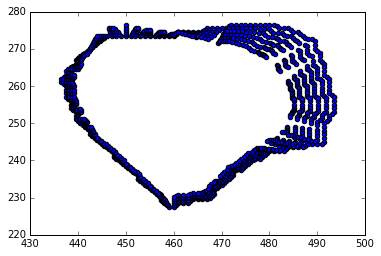

In [126]:
# for i in range(nlevels):
#     plt.scatter(interp_contours[i, :, 0], interp_contours[i, :, 1]);

In [29]:
# nlevels = 6
# interp_contours = interpolate_contours(contour1, contour2, nlevels)

In [97]:
mid_sec = (section_bs_begin + section_bs_end + 1)/2

In [98]:
interpolated_contours = [{} for _ in range(int(z_xy_ratio_downsampled*section_number_lookup[stack]))]
interpolation_limits = {}

for l in set(label_polygons.keys()) & set(labels):
    secs = label_polygons[l].dropna().keys()
    if len(secs) < 2: continue
    
    print l
#         print secs.min(), secs.max()
    diffs = np.diff(secs)
    peak = np.argmax(diffs)
    if diffs[peak] > 5:
        befores = secs[np.where(secs - mid_sec < 0)[0]]
        afters = secs[np.where(secs - mid_sec > 0)[0]]
        print secs.min(), befores.max()
        print afters.min(), secs.max()
#             plt.plot(np.diff(secs))
#             plt.show();
        interpolation_limits[l] = [(secs.min(), befores.max()), (afters.min(), secs.max())]
    else:
        print secs.min(), secs.max()
        interpolation_limits[l] = [(secs.min(), secs.max())]

    for lims in interpolation_limits[l]:
        considered_secs = sorted(set(range(lims[0], lims[1]+1)) & set(secs))
        n = len(considered_secs)
        for i in range(n):
            sec = considered_secs[i]            
            z0 = int(z_xy_ratio_downsampled*sec)
            interpolated_contours[z0][l] = label_polygons.loc[sec][l]            
            if i + 1 < n:
                next_sec = considered_secs[i+1]
                z1 = int(z_xy_ratio_downsampled*next_sec)
                interp_cnts = interpolate_contours(label_polygons.loc[sec][l], 
                                                   label_polygons.loc[next_sec][l],
                                                   z1-z0+1)
                for zi, z in enumerate(range(z0+1, z1)):
                    interpolated_contours[z][l] = interp_cnts[zi+1]

VLL
143 173
294 313
Tz
197 219
250 276
Gr
188 278
7n
149 204
257 316
7N
152 195
275 316
Amb
164 170
295 299
Sol
201 246
12N
206 247
sp5
131 327
LVe
154 175
295 296
AP
215 233
6N
205 213
5N
150 171
287 312
RtTg
190 228
233 278
SuVe
155 169
R
187 215
239 245
LC
175 184
267 273
Pn
175 229
246 294
LRt
161 188
300 306


In [77]:
pd.Series(interpolation_limits).to_hdf('/home/yuncong/Brain/database/'+stack+'_label_polygons.h5', 'zlimits')

In [78]:
from skimage.measure import find_contours

In [100]:
dm = DataManager(stack=stack)

img_height_downsampled = dm.image_height/downsample_factor
img_width_downsampled = dm.image_width/downsample_factor

volume = np.zeros((img_height_downsampled, 
                   img_width_downsampled, 
                   int(section_number_lookup[stack]*z_xy_ratio_downsampled)), np.int8)

print volume.shape

for z in range(volume.shape[2]):
        
    if len(interpolated_contours[z]) == 0:
        continue
    
    label_map_downsampled = np.zeros((img_height_downsampled, img_width_downsampled), np.int8)
    
    for l, vs in interpolated_contours[z].iteritems():
        vs_downsampled = vs/downsample_factor
        
        xmin, ymin = np.min(vs_downsampled, axis=0).astype(np.int)
        xmax, ymax = np.max(vs_downsampled, axis=0).astype(np.int)
                
#         if xmin > img_width_downsampled-1 or ymin > img_height_downsampled-1:
#             print 'min coordinates exceed image boundary'
#             continue

        xmin = max(0, xmin)
        ymin = max(0, ymin)
        xmax = min(xmax, img_width_downsampled-1)
        ymax = min(ymax, img_height_downsampled-1)
        
#         points_to_test = np.array(list(product(range(ymin, ymax+1), range(xmin, xmax+1))))[:,::-1]
        xs, ys = np.meshgrid(range(xmin, xmax+1), range(ymin, ymax+1))
        points_to_test = np.c_[xs.flat, ys.flat]
                
        is_contained = Path(vs_downsampled).contains_points(points_to_test)
        label_map_downsampled[points_to_test[is_contained, 1], 
                              points_to_test[is_contained, 0]] = label_dict[l]
    
#     label_map_downsampled = label_map[::downsample_factor, ::downsample_factor]
    
    volume[:, :, z] = label_map_downsampled.copy()
    
    del label_map_downsampled

(734, 838, 1209)


In [118]:
# for z in range(volume.shape[2]):
#     if np.count_nonzero(volume[..., z] == 'LRt') > 0:
#         print z     

In [119]:
# print int(161*z_xy_ratio_downsampled), int(189*z_xy_ratio_downsampled)
# for z in range(int(161*z_xy_ratio_downsampled), int(189*z_xy_ratio_downsampled)):
#     print z, np.count_nonzero(volume[..., z] == label_dict['LRt'])

In [ ]:
# constant contour for between annotated sections

In [15]:
dm = DataManager(stack=stack)

volume = np.zeros((dm.image_height/downsample_factor, 
                   dm.image_width/downsample_factor, 
                   int(section_number_lookup[stack]*z_xy_ratio_downsampled)), np.int8)

print volume.shape

for sec in range(section_bs_begin, section_bs_end+1):
    
    if sec not in label_polygons.index: continue
    
    print sec
    
    available_labels = label_polygons.loc[sec].dropna().index
    
    valid_labels = set(available_labels) & set(labels)
    
    if len(valid_labels) == 0:
        continue
    
    label_map = np.zeros((dm.image_height, dm.image_width), np.int8)
    for l in valid_labels:
        print l
        
        import time
        t = time.time()
        
        vs = label_polygons[l][sec]
        xmin, ymin = np.min(vs, axis=0)
        xmax, ymax = np.max(vs, axis=0)
                
        if xmin > dm.image_width - 1 or ymin > dm.image_height - 1:
            print 'min coordinates exceed image boundary'
            continue
        
        xmax = min(xmax, dm.image_width-1)
        ymax = min(ymax, dm.image_height-1)
        
#         points_to_test = np.array(list(product(range(ymin, ymax+1), range(xmin, xmax+1))))[:,::-1]
        xs, ys = np.meshgrid(range(xmin, xmax+1), range(ymin, ymax+1))
        points_to_test = np.c_[xs.flat, ys.flat]
        
        print time.time() - t
        
        is_contained = Path(vs).contains_points(points_to_test)
        label_map[points_to_test[is_contained, 1], points_to_test[is_contained, 0]] = label_dict[l]
    
    label_map_downsampled = label_map[::downsample_factor, ::downsample_factor]
    
    volume[:, :, int(z_xy_ratio_downsampled*sec):int(z_xy_ratio_downsampled*(sec+1))] = label_map_downsampled[..., np.newaxis].copy()
    
    del label_map_downsampled, label_map

(734, 838, 1209)
110
111
113
115
117
119
121
123
125
127
129
131
sp5
133
sp5
135
sp5
137
sp5
139
sp5
141
sp5
143
VLL
sp5
145
VLL
sp5
147
sp5
VLL
149
7n
VLL
sp5
150
7n
5N
VLL
151
7n
5N
VLL
sp5
152
7N
5N
VLL
7n
153
7n
7N
5N
VLL
sp5
154
VLL
7N
sp5
LVe
5N
7n
155
VLL
7N
SuVe
sp5
LVe
5N
7n
156
VLL
7N
sp5
LVe
5N
7n
157
VLL
7N
SuVe
sp5
LVe
5N
7n
158
VLL
7N
sp5
LVe
5N
7n
159
VLL
7n
7N
sp5
LVe
5N
SuVe
160
VLL
7n
7N
sp5
LVe
5N
SuVe
161
VLL
7n
7N
sp5
LVe
5N
LRt
SuVe
162
VLL
7N
sp5
LVe
5N
LRt
7n
163
VLL
7n
7N
sp5
LVe
5N
LRt
SuVe
164
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
165
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
SuVe
166
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
SuVe
167
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
SuVe
168
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
169
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
SuVe
170
VLL
7N
Amb
sp5
LVe
5N
LRt
7n
171
VLL
7N
sp5
LVe
5N
LRt
7n
172
VLL
7N
sp5
LVe
LRt
7n
173
VLL
7N
sp5
LVe
LRt
7n
174
7N
LRt
sp5
7n
175
LC
7N
sp5
LVe
LRt
7n
Pn
176
LC
7n
sp5
LRt
7N
Pn
177
LC
7n
sp5
LRt
7N
Pn
178
LC
7n
sp5
LRt
7N
Pn
179
LC
7n
sp5
LRt
7N
Pn
180


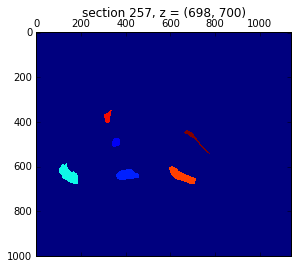

In [40]:
# for sec in range(section_bs_begin, section_bs_end+1):

sec = 257
plt.matshow(volume[..., int(sec*z_xy_ratio_downsampled)]);
plt.title('section %d, z = (%d, %d)'%(sec, int(sec*z_xy_ratio_downsampled), 
                                     int(z_xy_ratio_downsampled*(sec+1))-1));
plt.show();

In [80]:
ys, xs, zs = np.where(volume != 0)

xmin = xs.min()
xmax = xs.max()
ymin = ys.min()
ymax = ys.max()
zmin = zs.min()
zmax = zs.max()

print xmin, xmax
print ymin, ymax
print zmin, zmax

reduced_xdim = xmax+1-xmin
reduced_ydim = ymax+1-ymin
reduced_zdim = zmax+1-zmin
print reduced_xdim, reduced_ydim, reduced_zdim

66 979
339 714
347 801
914 376 455


In [81]:
bp.pack_ndarray_file(volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1],
                     os.path.join(volume_dir, 'volume_%(stack)s_annotation.bp' % {'stack': stack}))

In [82]:
with open(os.path.join(volume_dir, 'volume_%(stack)s_annotation_limits.txt' % {'stack': stack}), 'w') as f:
        f.write((' '.join(['%d']*6)+'\n') % (xmin, xmax, ymin, ymax, zmin, zmax))

In [87]:
with open(os.path.join(volume_dir, 'volume_%(stack)s_annotation_resolution.txt' % {'stack': stack}), 'w') as f:
        f.write((' '.join(['%f']*3)+'\n') % (downsample_factor, xy_pixel_distance_downsampled, z_xy_ratio_downsampled))

In [ ]:
np.savez_compressed(os.path.join(volume_dir, 
                                 'volume_%(stack)s_annotationAllClasses' % {'stack': stack}),
                    volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])

In [ ]:
np.savez_compressed(os.path.join(volume_dir, 
                                 'volume_%(stack)s_annotation' % {'stack': stack}),
                    volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])